# Simple EDA

In [3]:
# import required libraries and data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("../data/tips.csv")

## Explore dataset

In [5]:
# check how many rows and columns there are
df.shape

(244, 7)

In [6]:
# first update any blank strings with nan so it is caught as a null value
df = df.replace("", np.nan)
# use .info() to get an idea of the data types for each column and how many non null values there are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
# check unique values in categorical columns
cols = ['size', 'sex', 'smoker', 'day', 'time']

for col in cols:
    print(col, ' : ', df[col].unique())

size  :  [2 3 4 1 6 5]
sex  :  ['Female' 'Male']
smoker  :  ['No' 'Yes']
day  :  ['Sun' 'Sat' 'Thur' 'Fri']
time  :  ['Dinner' 'Lunch']


Frequency table for col :  size
   Category  Count  Percentage
0         2    156        63.9
1         3     38        15.6
2         4     37        15.2
3         5      5         2.0
4         1      4         1.6
5         6      4         1.6


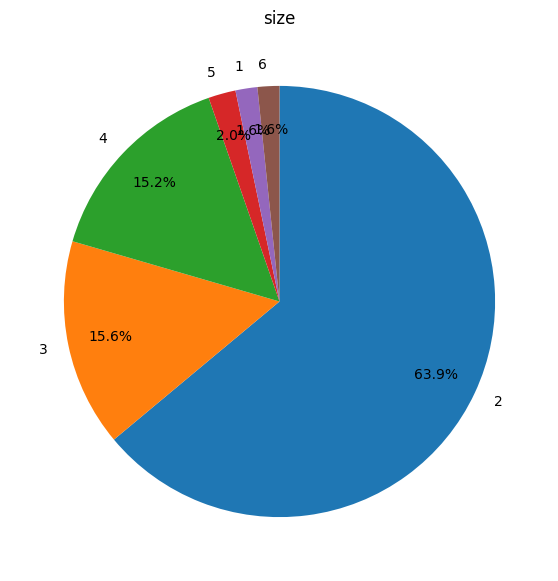

----------
Frequency table for col :  sex
  Category  Count  Percentage
0     Male    157        64.3
1   Female     87        35.7


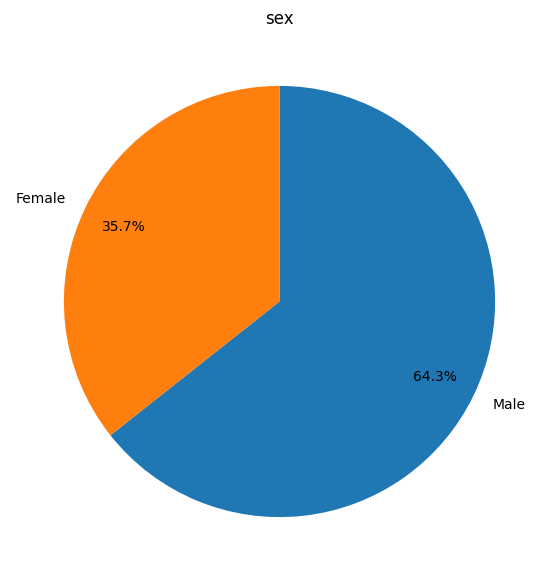

----------
Frequency table for col :  smoker
  Category  Count  Percentage
0       No    151        61.9
1      Yes     93        38.1


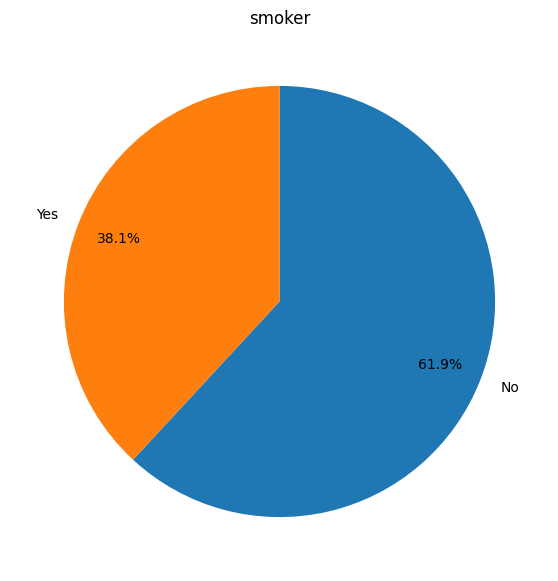

----------
Frequency table for col :  day
  Category  Count  Percentage
0      Sat     87        35.7
1      Sun     76        31.1
2     Thur     62        25.4
3      Fri     19         7.8


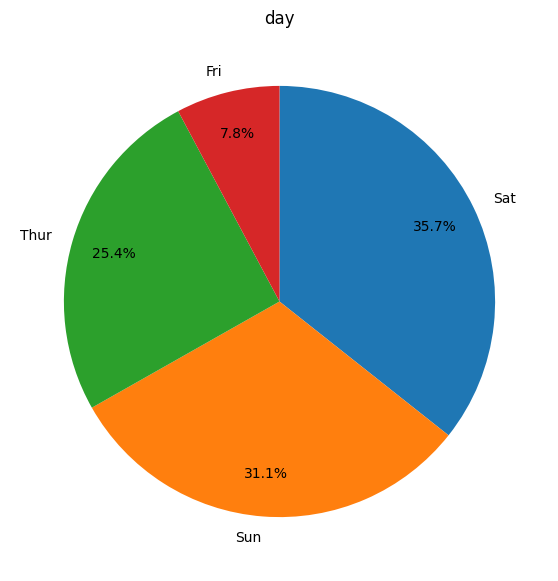

----------
Frequency table for col :  time
  Category  Count  Percentage
0   Dinner    176        72.1
1    Lunch     68        27.9


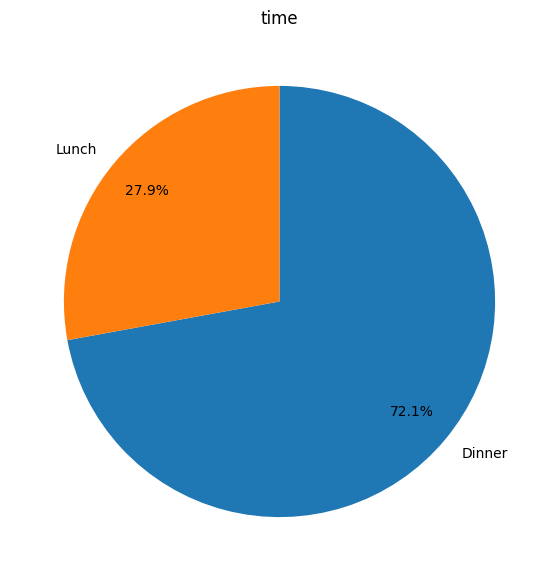

----------


In [17]:
# create frequency table for categorical cols
# Frequency counts

for col in cols:
    print('Frequency table for col : ', col)

    # Frequency table with percentages
    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = ['Category', 'Count']
    freq_table['Percentage'] = (freq_table['Count'] / freq_table['Count'].sum() * 100).round(1)

    print(freq_table)

    # pie chart by percentages
    freq_table = df[col].value_counts()
    plt.figure(figsize=(7,7))
    plt.pie(
    freq_table.values,
    labels=freq_table.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    pctdistance=0.8,    # percentages
    labeldistance=1.1   # category labels
    )   
    plt.title(str(col))
    plt.show()
    print('-'*10)

inital observations of the categorical column values show that most tips are from dinner at 71% of the data from dinners, similarly most diners are non smokers at 61% and male diners also at 63%, and most dining parties at 69%. The charts also show that saturday and sunday are the most popular days to dine at around 30% each closely followed by thursdays at around 25%, with Friday dining being the least popular.

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


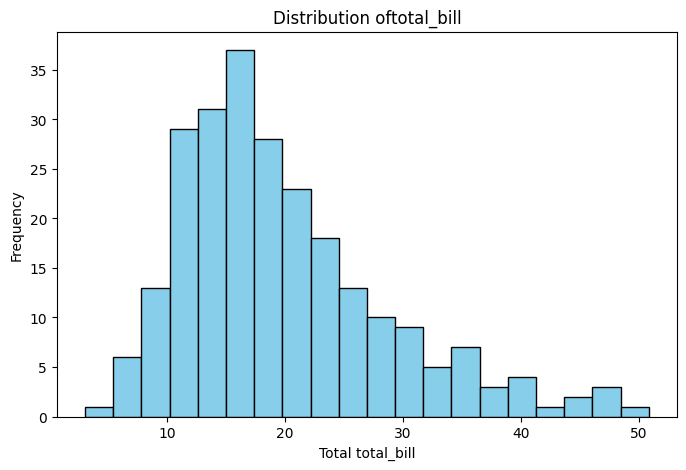

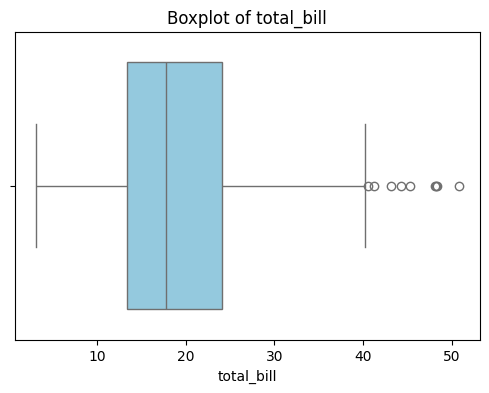

----------
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


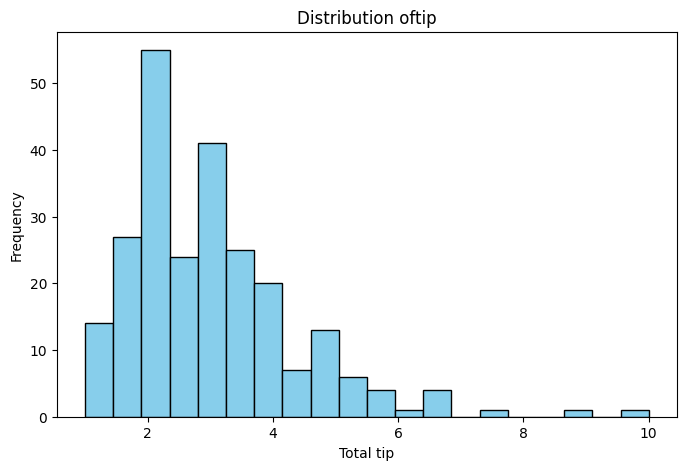

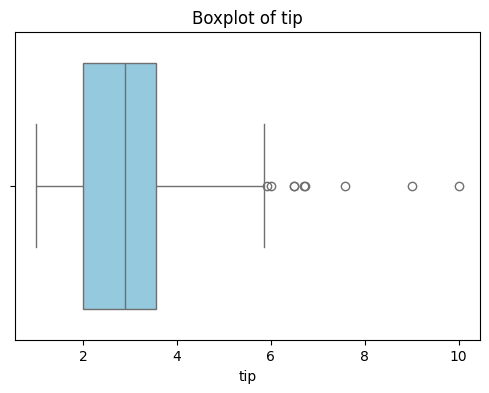

----------


In [23]:
# check quantative columns
cols = ['total_bill', 'tip']

for col in cols:
    # Basic numerical summary
    print(df[col].describe())

    # Histogram of total bill
    plt.figure(figsize=(8,5))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of" + str(col))
    plt.xlabel("Total " + str(col))
    plt.ylabel("Frequency")
    plt.show()

    # Basic boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title("Boxplot of " + str(col))
    plt.show()
    print('-'*10)

Initial review of the distribution of the numeric quantative columns total bill and tips, we can see that total bill column has a larger range from £3 to £50, however the bell distribution is right skewed and the left most outliers are raising the mean to s the median is in fact £17.7 , while most meals cost roughly between £13 to £24 according to the interquartile range. In the tips distribution we see a much smaller range between £1 and £10, with a mean of £3.00 and £2.90, which is close however given left outliers and the right skewing distribution, the mean is more than the median due to the outliers. The range and outliers is especially noticable in the box plots where tips has a smaller range but larger outlier spread. The disribution bell of the histograms is also bimodal in the tips but unimodal in the total bills not noticable through the box plots. 

# Summarised Output

# 📝 Full Technical Version (GitHub / Notion)

## 📊 Categorical Columns
From the frequency tables and pie charts:  

- **Dining Time:**  
  - Dinner accounts for **72%** of records  
  - Lunch accounts for **28%**  
  → The dataset is heavily biased toward dinner service.  

- **Smoker Status:**  
  - **62%** non-smokers vs **38%** smokers  

- **Sex:**  
  - **63% Male** vs **36% Female**  

- **Party Size:**  
  - **Parties of 2 dominate (64%)**  
  - Parties of 3 and 4 make up ~15% each  
  - Parties of 1, 5, and 6 are rare (~7% combined)  

- **Day of Week:**  
  - Saturday (**35.7%**) and Sunday (**31.1%**) are most popular  
  - Thursday (**25.4%**) follows  
  - Friday is least common (**7.8%**)  

⚠️ **Note:** The dataset is imbalanced — dinner meals, non-smokers, males, and parties of 2 dominate. This bias should be considered in later analyses.  

---

## 📈 Numerical Columns

### **Total Bill**
- Range: **£3.07 → £50.81**  
- Mean: **£19.79**  
- Median: **£17.80**  
- Interquartile Range (IQR): **£13.35 → £24.13**  

**Insights:**  
- Distribution is **right-skewed** with a long tail of high bills.  
- The mean is higher than the median, confirming the pull of right outliers.  
- Most meals fall between **£13–24** (middle 50%).  
- Outliers beyond £40 may represent **large groups or special events**.  

---

### **Tips**
- Range: **£1.00 → £10.00**  
- Mean: **£2.99**  
- Median: **£2.90**  
- IQR: **£2.00 → £3.56**  

**Insights:**  
- Also **right-skewed** with a long tail.  
- Outliers are more noticeable here relative to the range (e.g., very high tips >£7).  
- Mean is slightly above median, again due to right outliers.  
- Histogram suggests **possible bimodality**, which may link to dining time or party size.  

---

### **Boxplots**
- **Total Bill:**  
  Shows a concentrated range with several high-value outliers beyond £40.  

- **Tips:**  
  Narrower overall range, but with multiple extreme outliers above £7.  

---

## 🔎 Key Takeaways
1. **Dinner dominates the dataset** → any tip/dining-time analysis must note imbalance.  
2. **Party size 2 is most common** → tip behavior for larger groups is underrepresented.  
3. **Bills and tips are right-skewed** → median and IQR are better descriptors than mean.  
4. **Outliers exist** in both bills and tips, likely linked to large groups or unusual generosity.  
5. **Tips may be bimodal** → warrants follow-up analysis split by time of day or party size.  

---

## 🚀 Next Steps
- Create **derived variable**: `tip_pct = tip / total_bill`.  
  - Fairer measure of tipping behavior.  
- Explore **tip percentage by groups** (time of day, smoker, sex, day, size).  
- Use **boxplots by category** (e.g., tips by day, bills by smoker status).  
- Quantify bias and reliability (e.g., conclusions about lunch tips are based on only 28% of data).  


Rewritten via ChatGPT